## Import completed for required Libraries

In [84]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Loaded the dataset from SKlearn

In [2]:
from sklearn.datasets import load_boston
var = load_boston()

In [5]:
print(var.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
print(var.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(var.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
print(var.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Creating a description of loaded dataset for better understanding 

In [10]:
print(var.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
print(var.filename)

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv


## Passing the loaded data into Pandas Dataframe

In [125]:
df = pd.DataFrame(var.data, columns = var.feature_names)

In [14]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [16]:
df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 

## Creating a new column MEDV and passing target values to it

In [134]:
df['MEDV'] = var.target

In [18]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Checking datatypes in the dataframe

In [20]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Inpecting for any null values

In [21]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Creating a Boxplot

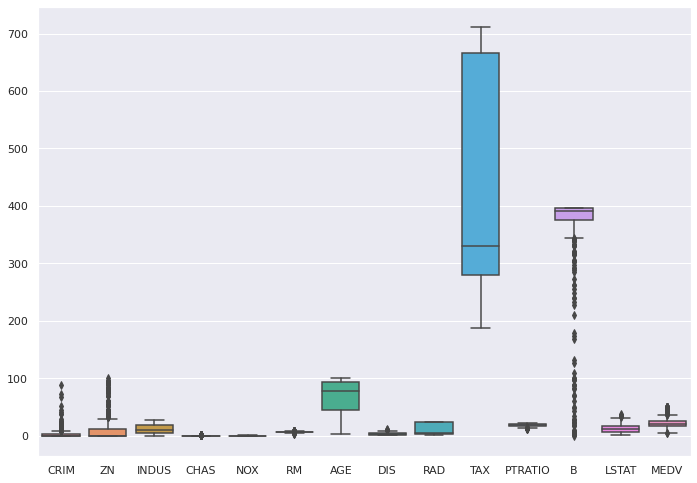

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df)

## sing seaborn to find corelation between different features and labels

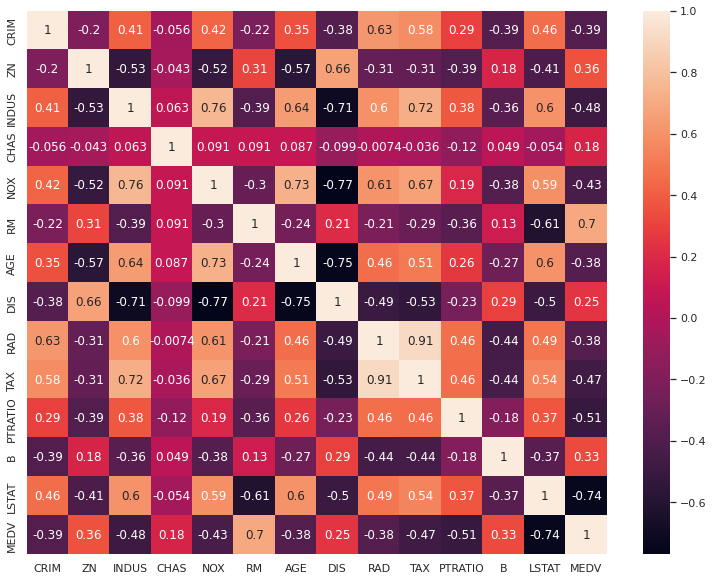

In [54]:
sns.set(rc={'figure.figsize':(13,10)})
dataplot = sns.heatmap(df.corr(), annot=True)

# Plotted KDE plot for each feature of the dataset which was required for individual desciption. 

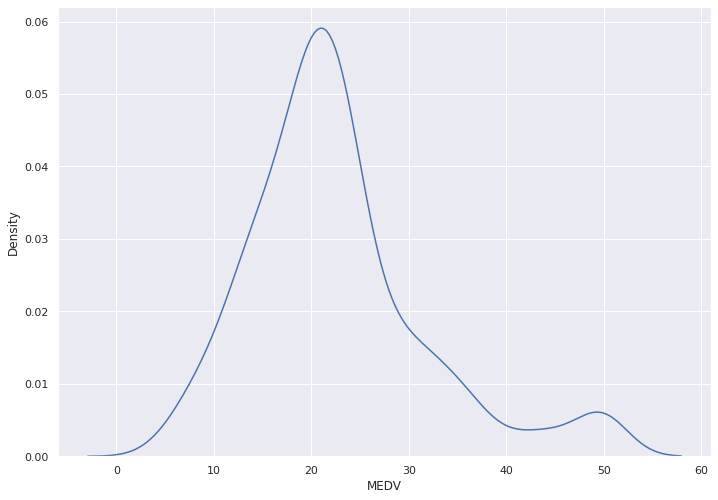

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="MEDV")

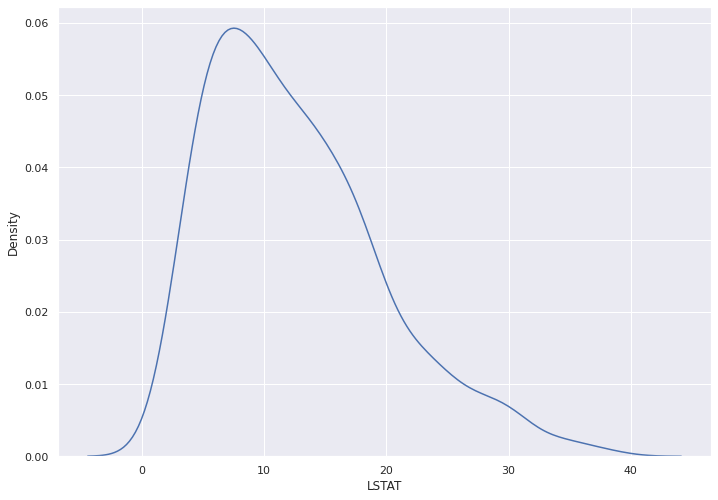

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="LSTAT")

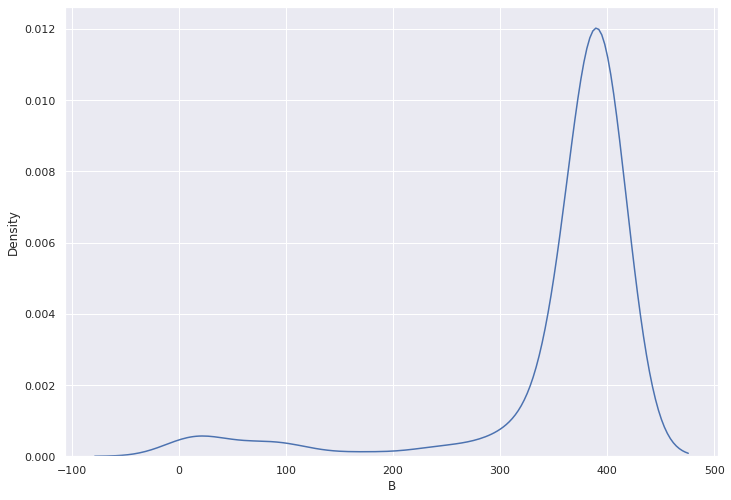

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="B")

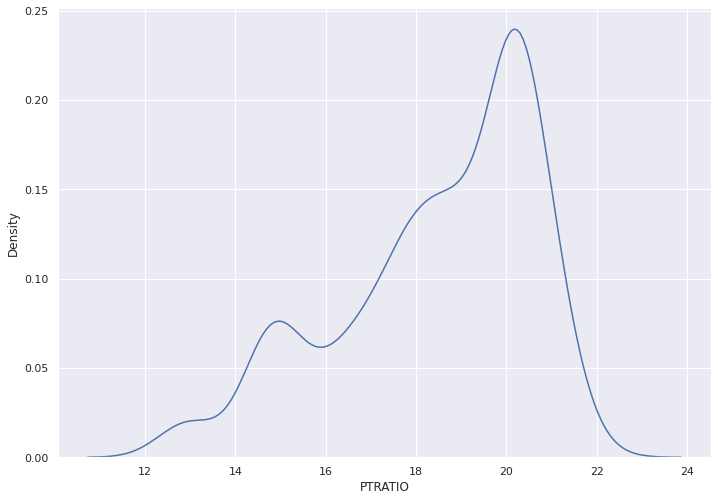

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="PTRATIO")

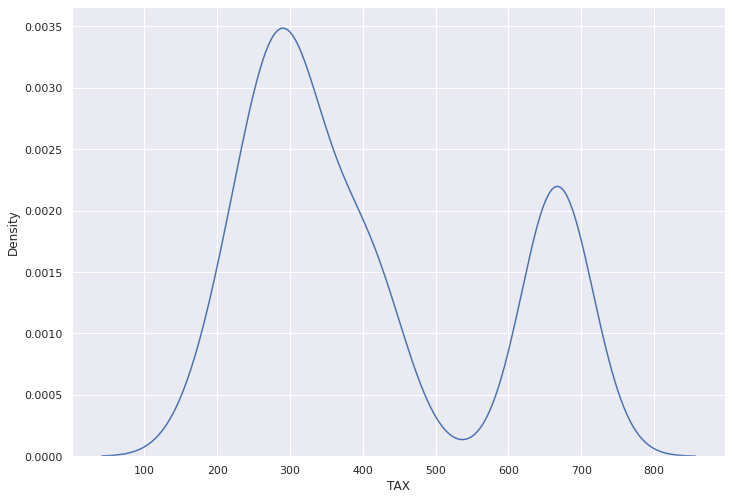

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="TAX")

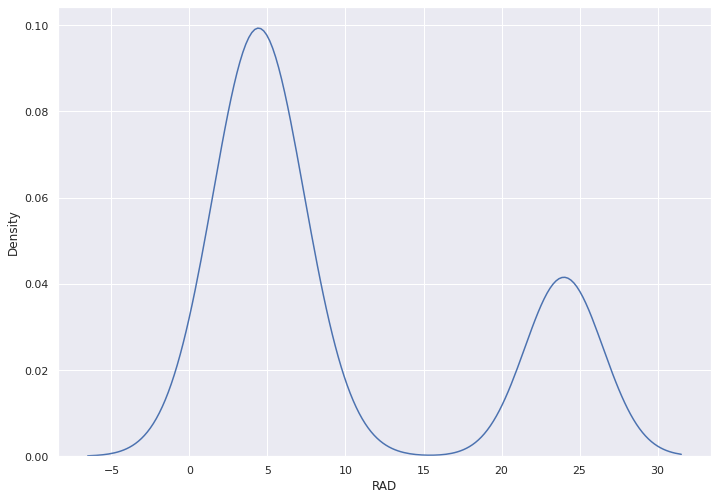

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="RAD")

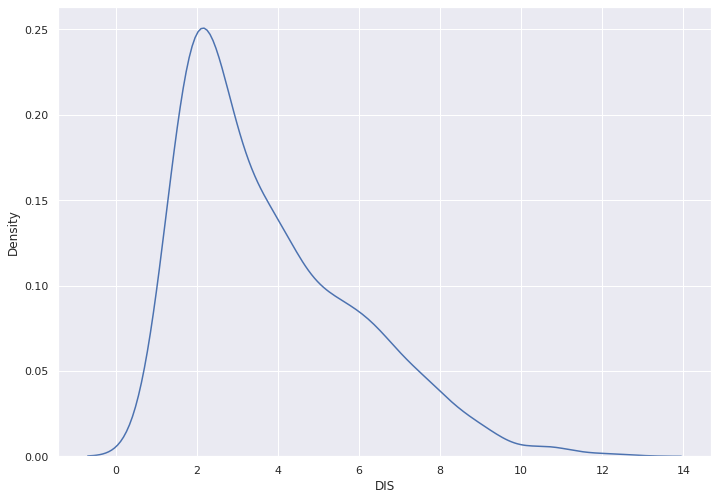

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="DIS")

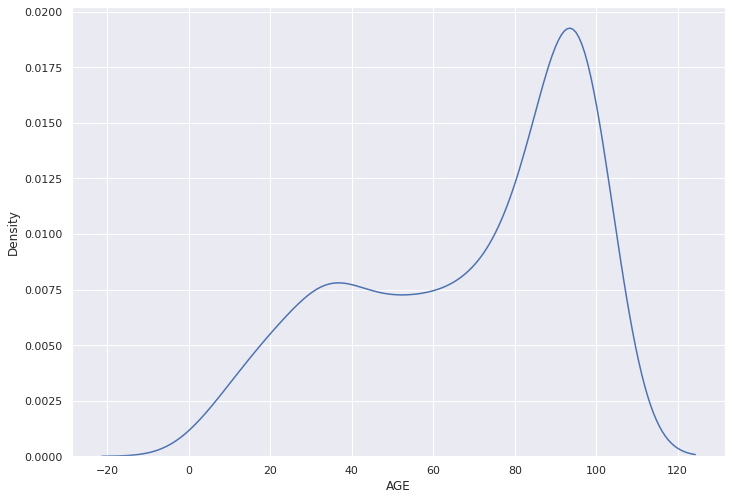

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="AGE")

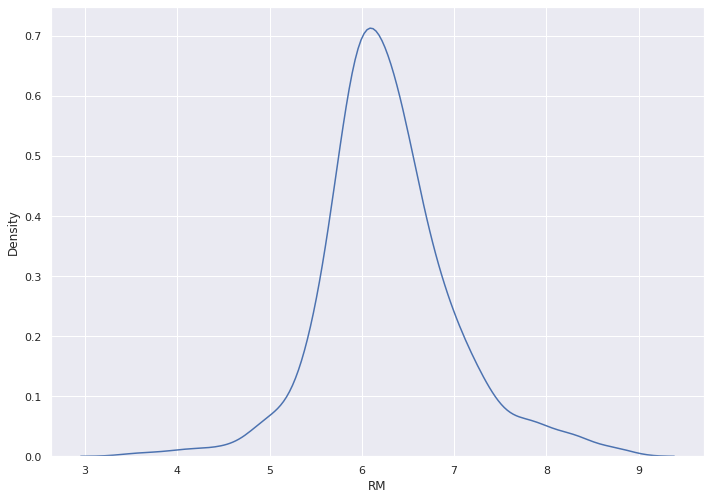

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="RM")

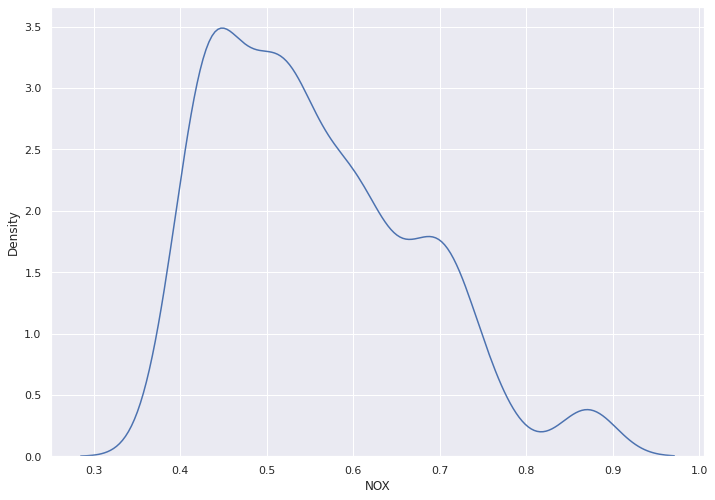

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="NOX")

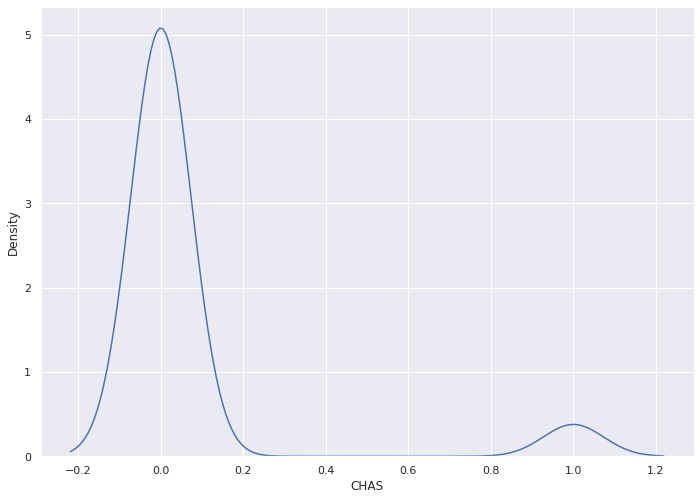

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="CHAS")

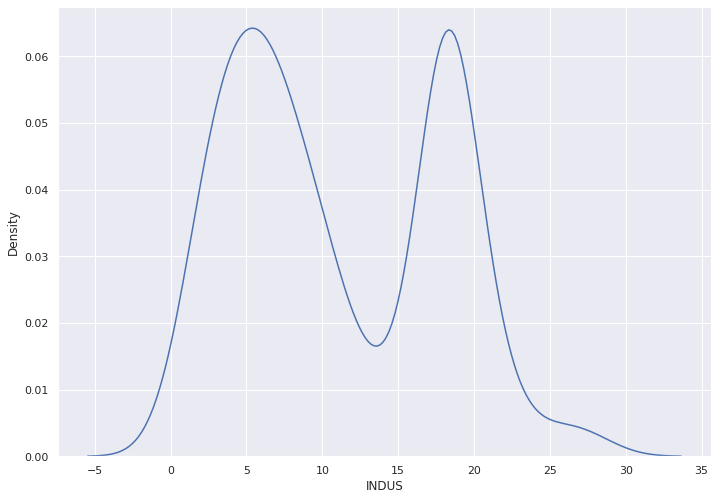

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="INDUS")

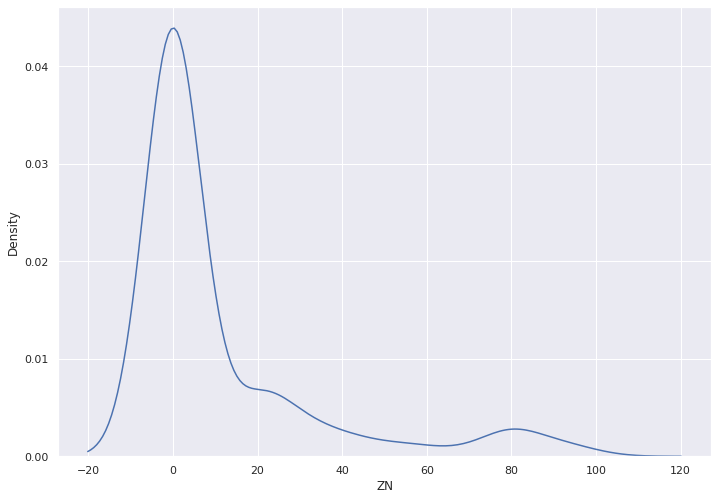

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="ZN")

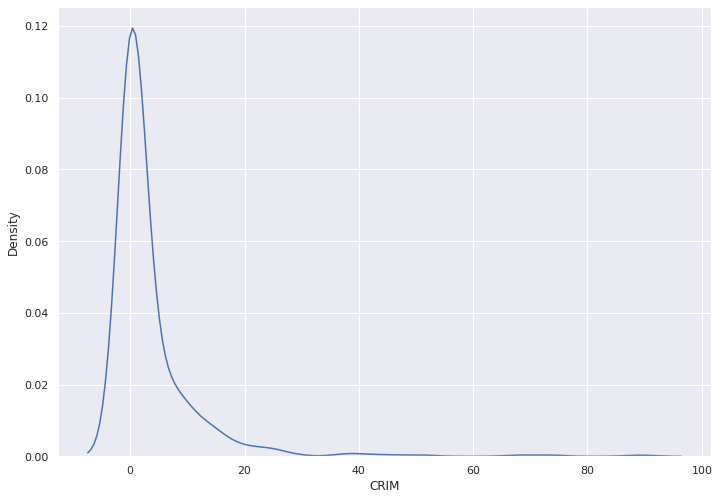

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="CRIM")

# Model implementation

In [70]:
x1 = df[['NOX','RM','DIS','PTRATIO','LSTAT']]
y1 = df[['MEDV']]
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size
=0.33,random_state = 5 )

## Using Regression on model data

In [122]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
edf = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
edf

,Actual,Predicted
0,MEDV 226 37.6 292 27.9 90 22.6 373 1...,"[[37.35385900103568], [28.37922539485654], [27..."


## Obtained R2 score for the model

In [88]:
metrics.mean_absolute_error(y_test, y_pred)
metrics.mean_squared_error(y_test, y_pred)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))
metrics.r2_score(y_test, y_pred)

0.6840953220739522

## Polynomial fitting and model testing

In [92]:
x1 = np.array(x_test['NOX'])
y1 = np.array(y_pred)
m,b=np.polyfit(x1, y1, 1)

## Created Regression plot along with regression line for NOX feature

Text(0, 0.5, 'Median Value')

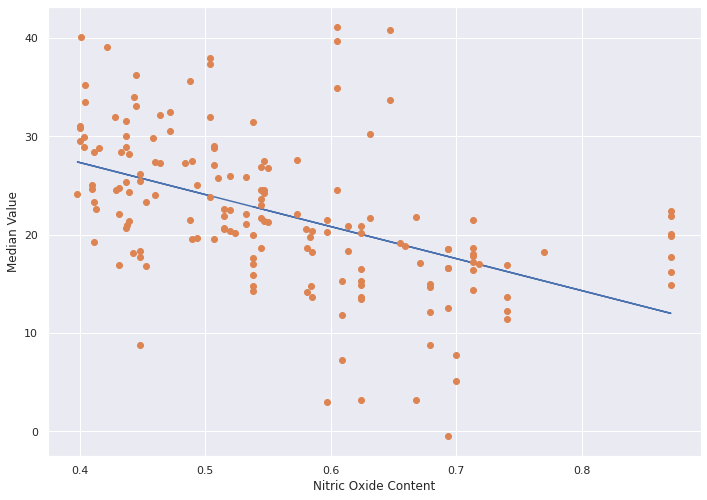

In [93]:
plt.plot(x_test['NOX'], m*x_test['NOX'] + b)
plt.plot(x_test['NOX'],y_pred,'o')
plt.xlabel("Nitric Oxide Content")
plt.ylabel("Median Value")

## Created regression plot for various features in order to analyse negative and positive plot

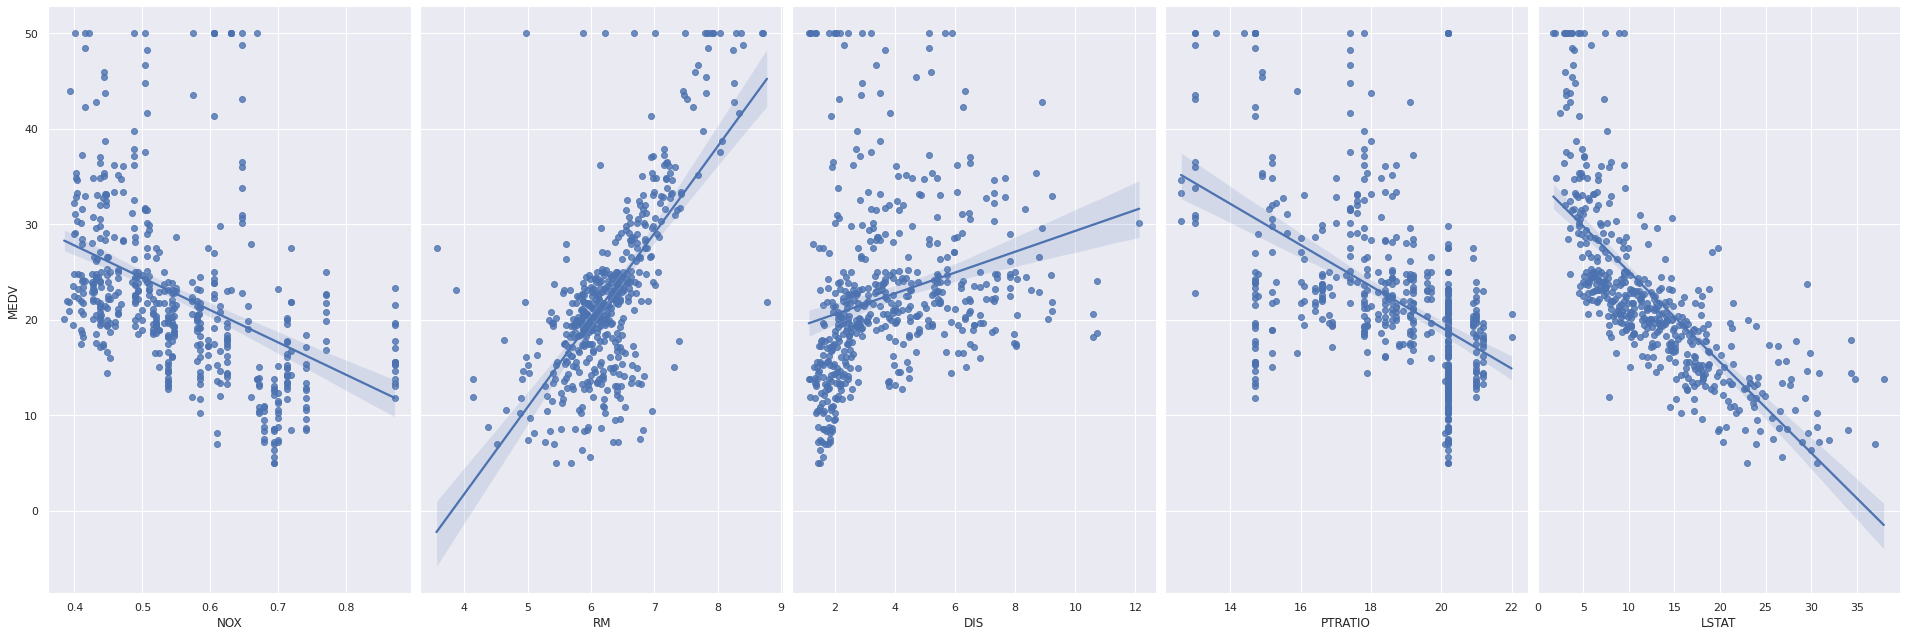

In [137]:
sns.pairplot (df, x_vars=['NOX','RM','DIS','PTRATIO','LSTAT'], y_vars='MEDV',height=9, aspect=0.6, kind='reg')